# 결정트리
* 스무고개 게임과 유사
* 새로운 규칙 조건마다 Sub Tree 생성
* Depth가 너무 깊으면 Overfitting : 결정 트리의 예측 성능 저하

# 지니계수
* 경제학자인 코라도 지니의 이름에서 딴 계수,0~1의 값을 가짐 0 : 평등, 1 : 불평등
* 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석, 지니계수가 낮은 속성을 지군으로 subtree 분할
* $GINI(S) = 1 - Σ(pᵢ)^2$


```
def gini(x):
    return 1 - ((x/x.sum())**2)
```



## 결정트리 장점
* 쉽고 직관적임
* 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
***
## 결정트리 단점
* 과적합으로 인한 알고리즘 성능이 떨어짐
* 이를 위해서 Depth 제한

In [1]:
# Graphviz (시각화 툴) 설치
!pip install Graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터 로드
iris_data = load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#학습
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

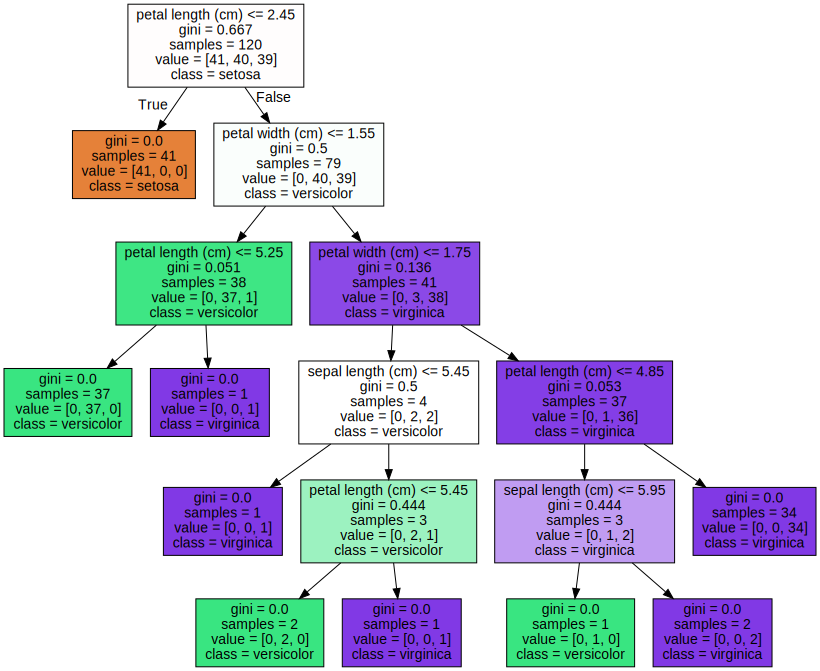

In [6]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 중요한 몇 개의 feature만 사용하여 모델을 간결하고, Outlier에 강한 모델로 변형
* seaborn을 사용하여 피처별로 중요도 값을 매핑, 시각화

Feature importances : 
 [0.025 0.    0.555 0.42 ]

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


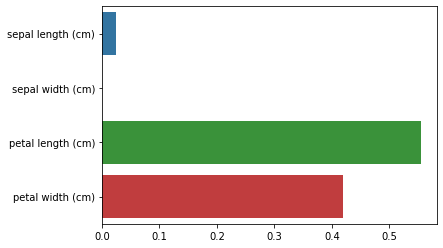

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print(f"Feature importances : \n {np.round(dt.feature_importances_, 3)}\n")

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt.feature_importances_):
    print(f'{name} : {value:.3f}')

#feature importance를 column별로 시각화
sns.barplot(x = dt.feature_importances_, y = iris_data.feature_names)


### petal length 의 중요도가 가장 높은 것을 알 수 있음.

#결정 트리 과적합

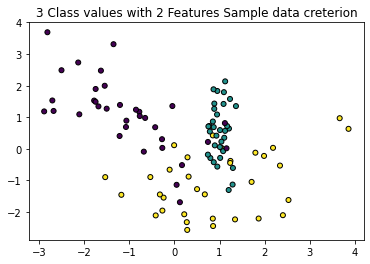

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creterion")

#2차원 시각화를 위하여 feature 2개, Class 3개의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화 클래스는 색으로 구분
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c=y_labels, s = 25, edgecolor = 'k')


In [21]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

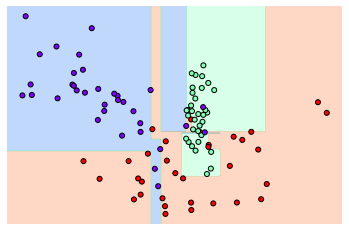

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

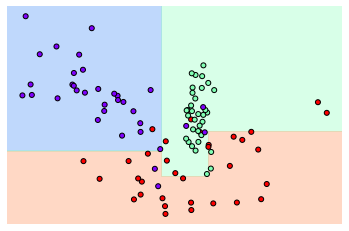

In [26]:
#min_samples_leaf = 6으로 트리 생성 조건 제약
dt = DecisionTreeClassifier(min_samples_leaf= 6).fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

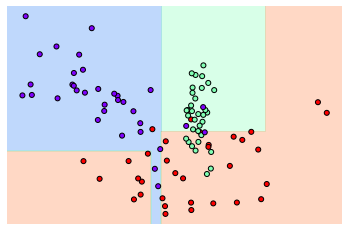

In [29]:
#max_depth = 3으로 트리 생성 조건 제약
dt = DecisionTreeClassifier(max_depth= 3).fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

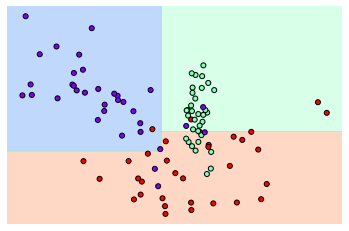

In [31]:
#max_depth = 2으로 트리 생성 조건 제약
dt = DecisionTreeClassifier(max_depth= 2).fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)